<img src="./img/HWNI_logo.svg"/>

# Lab A - Visualizing Bootstrapping and One-Sample Tests - Solutions

In [1]:
%matplotlib notebook

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats

import util.utils as utils
import util.shared as shared

shared.format_plots()
shared.format_dataframes()

## Introduction

Below, we'll visualize some of the key components of bootstrapping: the cumulative distribution functions of the population, the sample, and the bootstrap samples. We'll motivate this new visualization for bootstrapping by considering some of the pitfalls of the visualization in the tutorial.
Then, we'll work through bootstrapping for some one-sample hypothesis tests.

In the second half of the lab, we'll use bootstrapping to compute confidence intervals and $p$-values for the correlation.

A technical note: this notebook uses the interactive features of JuPyter notebooks. This means that when you generate a plot, you can keep adding things to that plot, so long as you don't either 1) make a new figure or 2) click the blue "power button" in the top-right corner of the figure. You should click this button after each animation terminates.

To prevent yourself from accidentally plotting into a figure you didn't mean to plot into, make sure to include a `plt.figure()` in each cell where you're making a plot. You'll want to do this before you do the plotting commands (`sns.distplot`, `plt.plot`,etc.).

## Visualizing Empirical Distributions

Bootstrapping relies on sampling from a particular distribution:
the *empirical distribution*,
which places probability $\frac{1}{N}$ on each value in the dataset.
We sample from this distribution by randomly drawing,
with replacement,
data values with equal probability.

The idea of an empirical distribution arises quite naturally. However, they're a very tricky thing to visualize correctly. The below set of exercises will show you why we can't write down a probability density function for the empirical distribution.

### Empirical Distributions Don't Have Probability Density Functions

First, generate a data sample from the standard `uniform` distribution. In the interest of computation time, pick a small sample size, like 5 or 15.

In [2]:
data = np.random.uniform(size=15)

Now, plot the data using `distplot`. Include both the `kde` and the `hist`ogram but not the `rug`plot. Start with a small bin size, like 0.1.

<IPython.core.display.Javascript object>


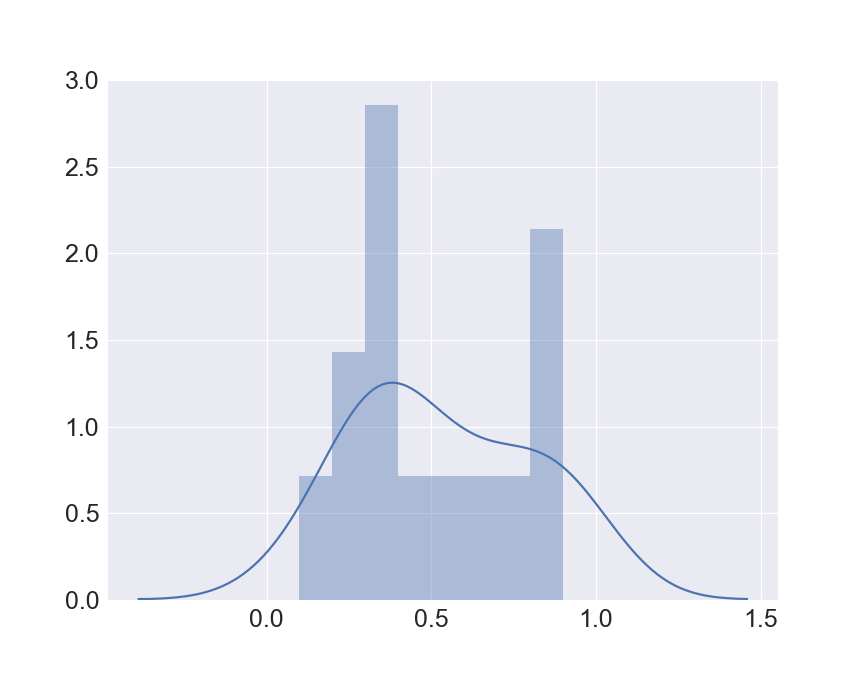

In [3]:
binsize = 1e-1
bins = np.arange(start=0,step=binsize,stop=1)

plt.figure()

sns.distplot(data,bins=bins);

Note that the values on the y-axis are sometimes higher than 1. As discussed at the beginning of the course, this is somewhat counter-intuitive.

#### Q1 What does the y-axis represent? Why is it OK that it goes above 1?

<font color="1874CD"> ** It represents the probability *density* at each point. This is not to be confused with the probability, which cannot be greater than 1. **

Now, reduce the binsize above to a smaller number -- divide by five or more -- and plot the data again.

#### Q2 What happens to the histogram?

<font color="1874CD"> ** The heights of the bars get taller as they get skinnier! **

We can keep making the bin size smaller and smaller -- though it starts taking longer and longer for Python to compute the histogram.

The "empirical distribution" corresponds to a binsize of *exactly* 0.

#### Q3 Give an intuitive explanation for why this is the case and why this is a problem for viewing the empirical distribution as a density.

<font color="1874CD"> ** The empirical distribution puts a probability of $1/n$ at each data *point*. That means that there's a finite amount of mass on something with zero volume. When we go to calculate the density, we have a finite number over 0, and we get $\infty$! We can't use the normal graph of a function to visualize something that goes to infinity. **

This means that we don't really have a probability density for our empirical distribution, so we can't visualize it the way we do other probability densities.

When we do want to visualize a data distribution directly, we often "cheat" and use something like a rugplot or a scatterplot. 

#### Q4 Think about the benefits and drawbacks of using the rugplot as a stand-in for the empirical distribution. You might compare it to a kernel density estimate or a stripplot. Write your thoughts down here.

<font color="1874CD"> ** The rugplot "works" in that it lets us know where the datapoints lie, but it runs into issues when there's more than one datapoint in the same spot and it doesn't do a great job showing the density of points -- it's not as easy to read off relative densities from a rugplot as it is from a kernel density estimate. Stripplots with jitter are often better for continuous data and swarmplots can handle discrete or continuous or mixed data fairly well. Kernel densities do OK on data that can take on any value on the number line, but do badly outside of that regime. **

### Empirical Distributions Do Have Cumulative Distribution Functions

We can still accurately visualize empirical distributions, we just need a different tool - the cumulative distribution function.

Recall that the cumulative distribution function ("CDF") of a random variable $X$ tells us, for any value $x$, the chance that the random value $X$ is less than or equal to $x$. Look back to the probability and statistics tutorials at the beginning of the course for a reminder of what the CDF is. The empirical CDF is the cumulative density function of the empirical distribution. The empirical CDF will be calculated by `utils.make_eCDF` and returned as a function.

In the cell below, generate a dataset of size no greater than 20 from the probability distribution of your choosing and then plot the cumulative distribution function for the empirical distribution using `utils.make_eCDF`.

You'll want to use the `pyplot` (alias `plt`) function `.plot`. You only need its simplest features: if you put in two arrays, `xs` and `ys`, it will draw a line that connects all the x,y pairs. The function call will look like `plt.plot(xs, ys)`. `xs` and `ys` need to be the same length. Make sure to call `plt.figure()` to make figure to plot into before calling `.plot`.

<IPython.core.display.Javascript object>


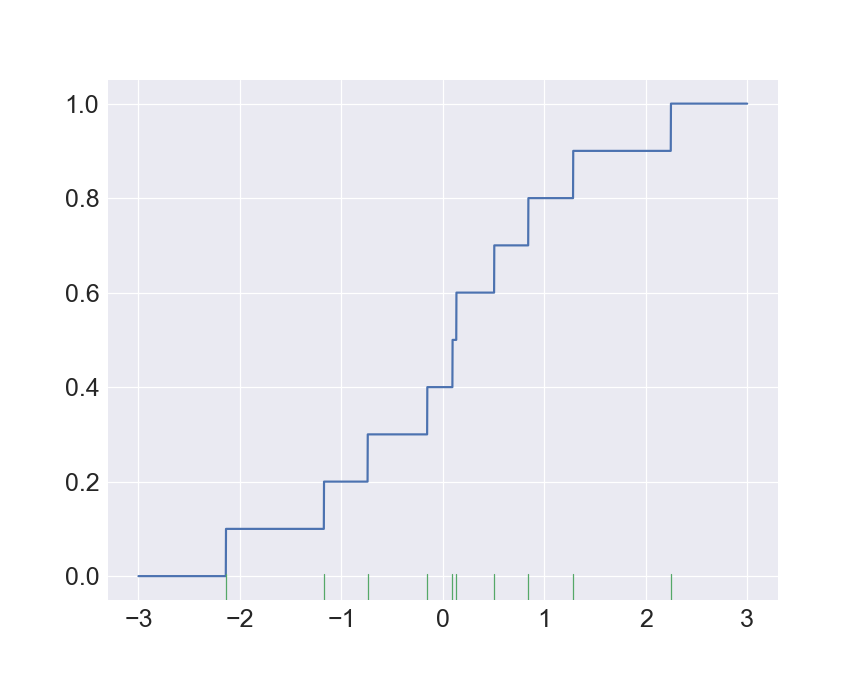

In [4]:
data = np.random.standard_normal(size=10)

eCDF = utils.make_eCDF(data)

input_range = np.arange(-3 ,3, 0.001)

plt.figure()
plt.plot(input_range, [eCDF(input) for input in input_range])
sns.distplot(data, kde=False, hist=False, rug=True);

#### Q5 It should look like a "staircase" that goes up in level by $\frac{1}{N}$ every time it passes a datapoint. Why is this the case?

<font color="1874CD"> ** The empirical distribution places probability mass $\frac{1}{N}$ at each data point. **

Add a `rugplot` to your visualization of the CDF using `sns.distplot`.

#### Q6 How are these two plots connected?

<font color="1874CD"> ** Wherever there's a tick mark on the rug plot, there's a step up on the CDF. **

## Visualizing Bootstrapping

### Visualizing Sample eCDFs

The cell below will generate an animation that shows the true cumulative distribution function of a random variable in black along with the empirical cumulative distribution functions (eCDFs, for short) of different samples of the same size. You can control the number of samples with the keyword argument `num_samples` and the sample size with the keyword argument `sample_size`. It defaults to sampling a standard normal variable -- read the documentation (with `util.animate_samples?`) if you'd like to sample a different variable.

<IPython.core.display.Javascript object>


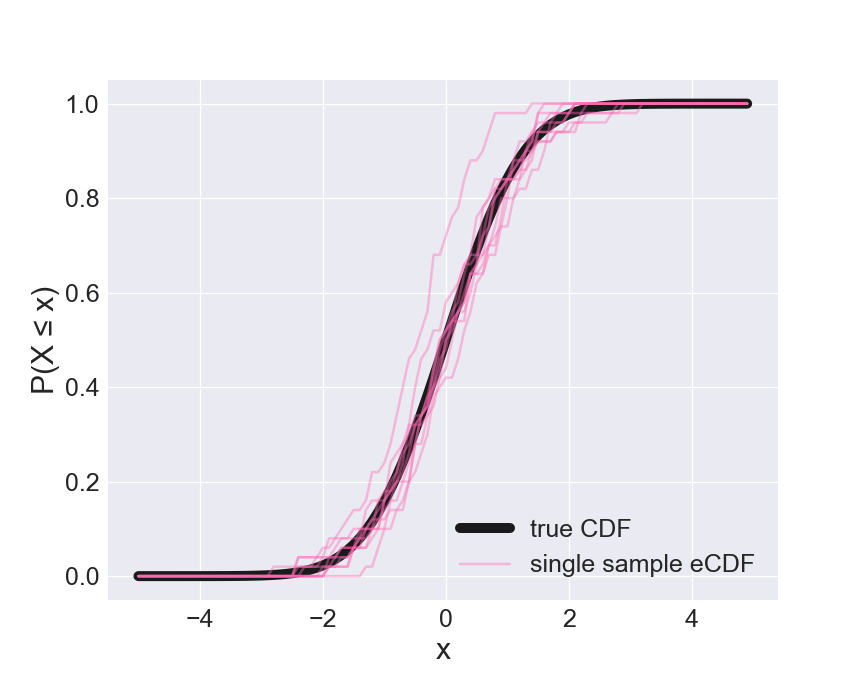

In [2]:
utils.animate_samples(sample_size=50)

Set the sample size to a small value -- less than 5.

#### Q7 How close are the individual eCDFs to the true, population CDF?

<font color="1874CD"> ** At a low sample size, the individual CDFs are quite far apart. **

#### Q8 What would you say the "average" of the eCDFs looks like?

<font color="1874CD"> ** On average, the eCDFs are much closer to the true CDF. **

Increase the sample_size by a factor of 10 or more.

#### Q9 What happens to each eCDF individually? What happens to the eCDFs as a group?

<font color="1874CD"> ** The individual eCDFs become closer to the true CDF. The group becomes less spread out. **

The next cell will animate the process of taking successively bigger samples. With each frame of the animation, the eCDF of a sample of increasing size will be plotted over the true, population CDF. In each frame, the sample size appears in the top center of the plot.

<IPython.core.display.Javascript object>


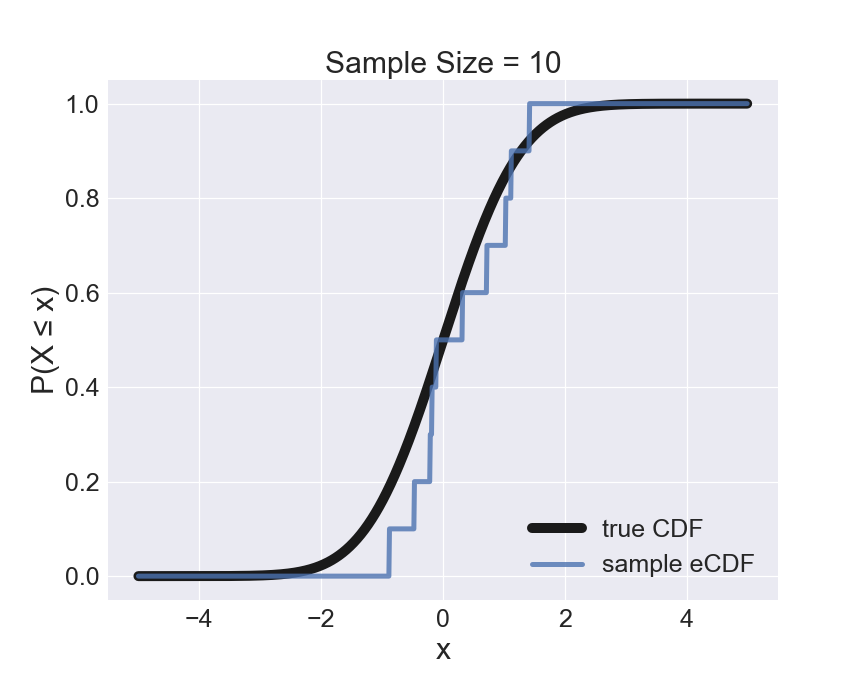

In [2]:
sampler = np.random.standard_normal
true_CDF = scipy.stats.norm.cdf

input_range = np.arange(-5, 5, 0.01)

sample_sizes = [1,2,3,4,5,6,
               10,]#20,30]#,40,50,60,70]

utils.animate_sampling(sampler=sampler,
                  true_CDF=true_CDF,
                  input_range=input_range,
                 sample_sizes=sample_sizes)

#### Q10 What happens to the eCDF as the number of samples goes up?

<font color="1874CD"> ** It gets closer to the the true CDF. **

You can change which sample sizes are plotted by providing a list of sample sizes as the keyword argument `sample_sizes`.

Set the sample sizes so that they only change by one with each frame of the animation -- for example, the list `[1,2,3,4,5]` works.

Once you've got the above working, pick a particular value of x. Watch how the eCDF changes at that point as the sample size goes up.

#### Q11 Frame by frame, does the eCDF always get closer to the true CDF at that point? Is this surprising?

<font color="1874CD"> ** No it does not. Maybe it is. **

#### Challenge Q Taking the last question into account, can you describe the sense in which the eCDF is "getting closer" to the true CDF?

<font color="1874CD"> ** There are (at least) two good answers to this question. For one, we should *expect* a point to get closer to the eCDF, rather than further, even if it doesn't do that every time. For another, the probability that any point on the eCDF is a given distance away from its partner on the CDF is going down over time. We can make this even stronger: the probability that the greatest distance, over all points, between points on the eCDF and the CDF is bigger than any given value is going down over time. **

### Visualizing Bootstrap CDFs

Finally, let's visualize the bootstrap procedure itself.

The cell below will first plot the true CDF of a population.

Then, it will draw a sample from that distribution and plot the empirical CDF.

Then, it will perform a number of bootstrap resamplings from the empirical distribution. As is usual for the bootstrap, we'll draw, with replacement, as many times as there are points in our dataset. The eCDF for each bootstrap sample is then plotted as a thin, transparent line (with a bright green color).

Lastly, it will sample again from the true distribution and plot the CDF for each. These samples have the same size as the original data sample and the bootstrap samples. The bootstrap relies on these (hot pink) CDFs being distributed in roughly the same way as the bootstrap CDFs.

<IPython.core.display.Javascript object>


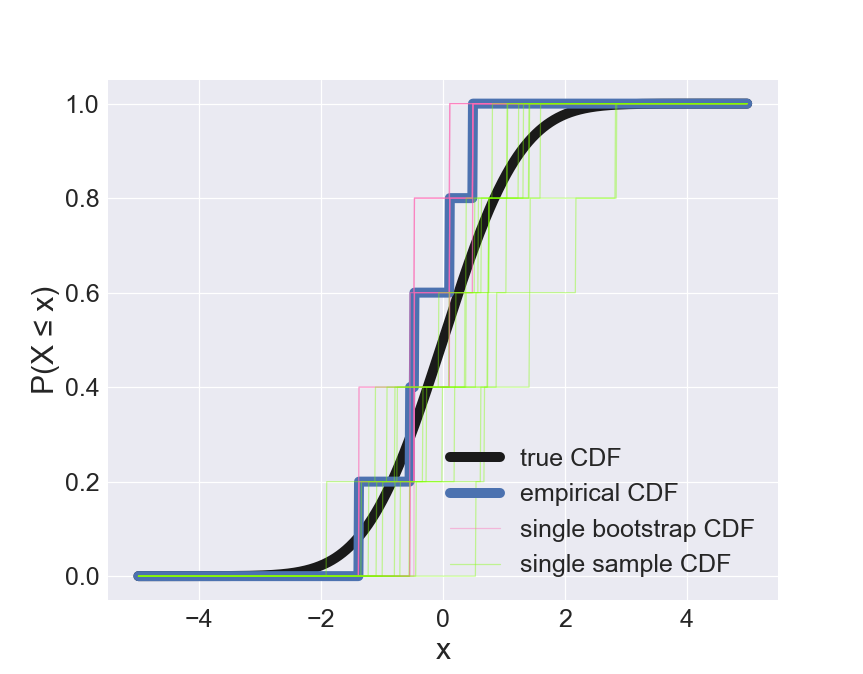

In [7]:
sampler = np.random.standard_normal
true_CDF = scipy.stats.norm.cdf

input_range = np.arange(-5,5,0.01)

utils.animate_bootstraps(sampler=sampler,
               true_CDF=true_CDF,
               input_range=input_range,
               sample_size=5,
                num_bootstraps=10)

#### Q12 How similar do the other sample CDFs look to the bootstrap CDFs? What does this mean for the bootstrap?

<font color="1874CD"> ** They look quite similar! The bootstrap should give good estimates. **

Decrease the `sample_size` to `5`.

#### Q13 What changes?

<font color="1874CD"> ** The bootstrap CDFs look much less like the resample CDFs. **

## More Visualizations

If you'd like, you can view the CDFs, eCDFs, and bootstrapping behavior of more distributions by changing the `sampler` and `true_CDF` keyword arguments to all of the functions above. Note that `sampler`s come from numpy while `true_CDF`s come from `scipy.stats`. Note that you don't want to *call* the functions (that is, follow them with parentheses), you want to pass the functions themselves as arguments.

When you do this, you'll want to change the `input_range` keyword argument -- it's best if it covers 95-99% of the possible values.

Some example pairs:

1. `np.random.standard_exponential` and `scipy.stats.expon.cdf`
1. `np.random.standard_cauchy` and `scipy.stats.cauchy.cdf`